### 4-1. 인구현황 데이터 분석

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

data = pd.read_csv('data/인구현황.csv')
print(data.shape)
print(type(data))

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

matplotlib.rc('font', family=font_name)

(18, 8)
<class 'pandas.core.frame.DataFrame'>
Malgun Gothic


In [ ]:
# 1. 지역별 총인구수 Top5
re_df = data.loc[data['행정기관'] != '전국', ['행정기관', '총인구수']].sort_values(by='총인구수', ascending=False).reset_index(drop=True)
re_df.head(5)

In [ ]:
# 1-1. 지역별 총인구수 plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

pop_plot = sns.barplot(data=re_df.sort_values(by='총인구수',ascending=False),x='행정기관',y='총인구수',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 총인구수')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [ ]:
# 2. 세대당 인구수 높은 지역 Top5
no_df = data.loc[data['행정기관'] != '전국', ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
no_df.head(5)

In [ ]:

# 2-1. 지역별 세대당 인구 Plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

pop_plot = sns.barplot(data=no_df.sort_values(by='세대당 인구',ascending=False),x='행정기관',y='세대당 인구',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 세대당 인구')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [ ]:
# 3. 남녀 비율 분석
ge_df = data.loc[data['행정기관'] != '전국', ['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)
ge_df

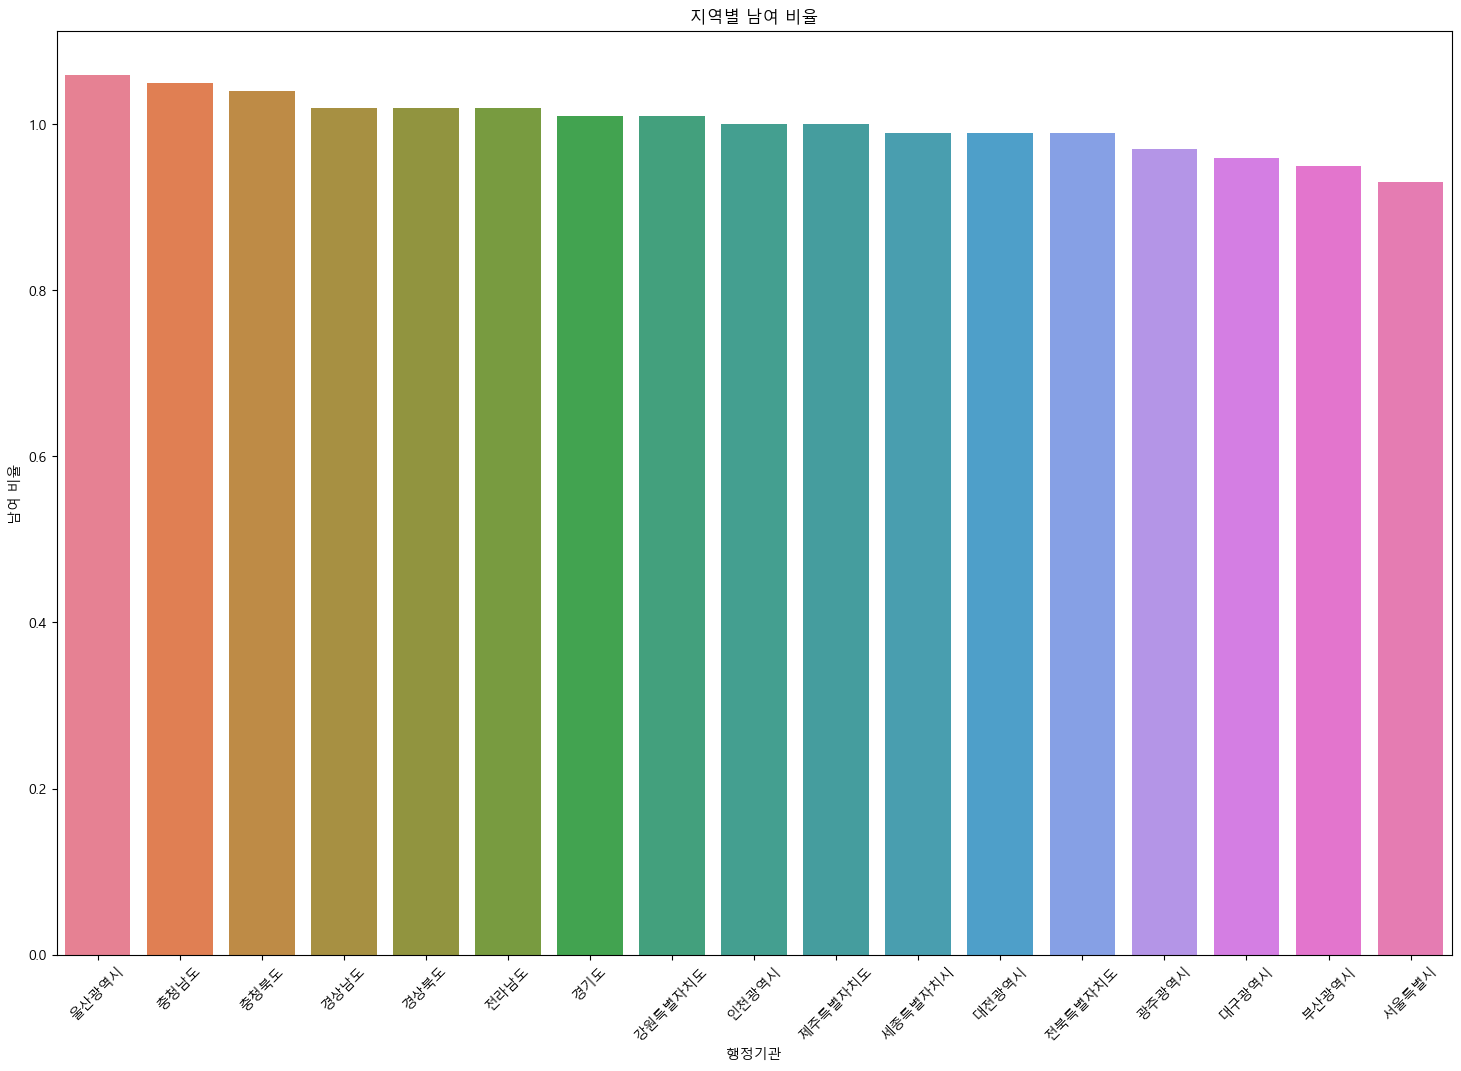

In [46]:
# 3-1. 남녀 비율 분석 Plot
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

pop_plot = sns.barplot(data=ge_df.sort_values(by='남여 비율',ascending=False),x='행정기관',y='남여 비율',ax=axes1,hue='행정기관')
pop_plot.set_title(f'지역별 남여 비율')

for item in pop_plot.get_xticklabels(): 
    item.set_rotation(45)

plt.show()

In [ ]:
# 4. 남자초과 / 여자초과 분석
import numpy as np

geov_df = data.loc[data['행정기관'] != '전국', ['행정기관', '남여 비율']]
geov_df['남초여초'] = np.where(geov_df['남여 비율'] > 1, '남초',np.where(geov_df['남여 비율'] < 1, '여초', '동일'))

geov_df

In [ ]:
# 5. 세대당 인구 평균보다 높은 지역

avg_household = data.loc[data['행정기관'] != '전국', ['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)
avg_no = data.loc[data['행정기관'] != '전국', '세대당 인구'].mean()

print(f'5. 세대당 인구 평균보다 높은 지역\n 전국 평균 세대당 인구수: {avg_no:.2f}')
avg_household

In [ ]:
# 5-1.   남초 vs 여초 개수 Plot  ( seaborn의 countplot 지역별 세대수 Plot ( seaborn의 barplot )
household_df = data.loc[data['행정기관'] != '전국', ['행정기관', '세대수']].sort_values(by='세대수', ascending=False).reset_index(drop=True)
gender_count = geov_df['남초여초'].value_counts().reset_index()
gender_count.columns = ['남초여초', '개수']

figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches(18,12)

household_plot = sns.barplot(data=household_df.sort_values(by='세대수',ascending=False),x='행정기관',y='세대수',ax=axes2,hue='행정기관')
household_plot.set_title(f'지역별 세대수')

geov_plot = sns.barplot(data=gender_count, x='남초여초',y='개수',order = ['여초', '동일', '남초'], ax=axes1,hue='남초여초')
geov_plot.set_title(f'남초 vs 여초 지역 개수')

plt.show()